In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
Web_data_1 = pd.read_csv("/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_web_data_pt_1.txt")
Web_data_2 = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_web_data_pt_2.txt')
Final_demo = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_demo.txt')
Clients = pd.read_csv('/Users/levinschily/Desktop/IRONHACK/Week5/project/df_final_experiment_clients.txt')

combined_df = pd.concat([Web_data_1, Web_data_2], ignore_index=True)
combined_df.drop_duplicates()

merged = combined_df.merge(Clients, on='client_id', how='inner')

df = merged.merge(Final_demo, on='client_id', how='inner')
df.drop_duplicates()
df

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN,10.0,121.0,49.0,M,2.0,97748.22,2.0,2.0


In [16]:
df["date_time"] = pd.to_datetime(df["date_time"])

df = df.sort_values(by=["Variation", "client_id", "visit_id", "process_step", "date_time"])

df_last_step = df.groupby(["Variation", "client_id", "visit_id", "process_step"]).tail(1)

df_pivot = df_last_step.pivot(index=["Variation", "client_id", "visit_id"], columns="process_step", values="date_time").reset_index()

df_pivot["start_to_step1"] = (df_pivot.get("step_1") - df_pivot.get("start")).dt.total_seconds()
df_pivot["step1_to_step2"] = (df_pivot.get("step_2") - df_pivot.get("step_1")).dt.total_seconds()
df_pivot["step2_to_step3"] = (df_pivot.get("step_3") - df_pivot.get("step_2")).dt.total_seconds()
df_pivot["step3_to_confirm"] = (df_pivot.get("confirm") - df_pivot.get("step_3")).dt.total_seconds()

for col in ["start_to_step1", "step1_to_step2", "step2_to_step3", "step3_to_confirm"]:
    df_pivot = df_pivot[df_pivot[col] >= 0]

avg_times = df_pivot.groupby("Variation")[["start_to_step1", "step1_to_step2", "step2_to_step3", "step3_to_confirm"]].mean().round(2)

print("\n Average time (in seconds) per step by group:")
print(avg_times)


 Average time (in seconds) per step by group:
process_step  start_to_step1  step1_to_step2  step2_to_step3  step3_to_confirm
Variation                                                                     
Control                50.60           49.58           94.69            135.51
Test                   43.55           42.46           93.24            143.01


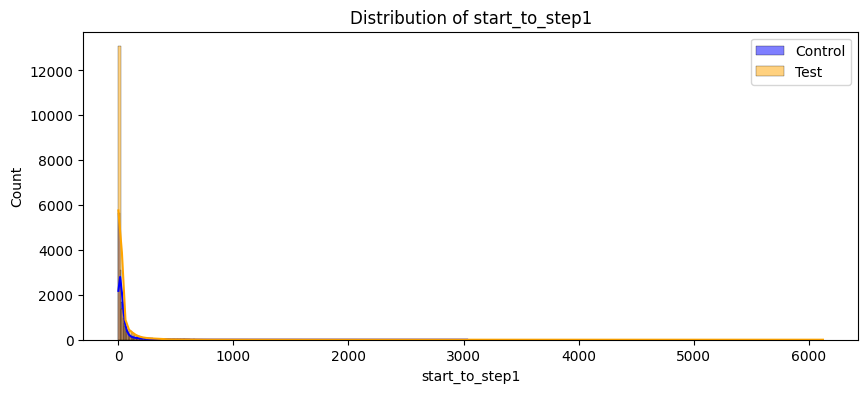

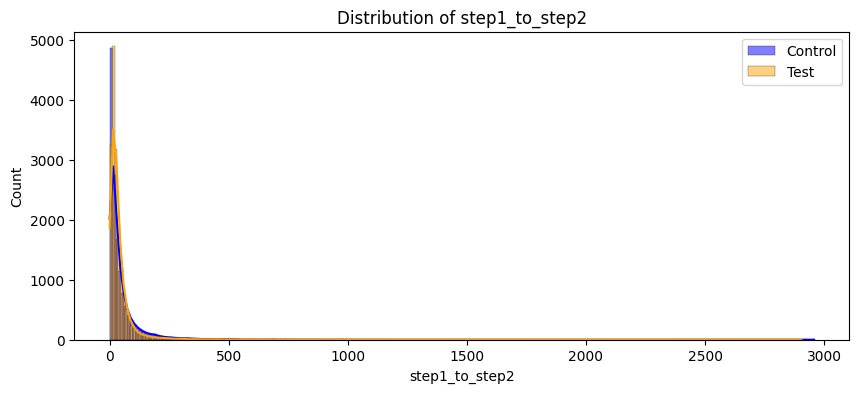

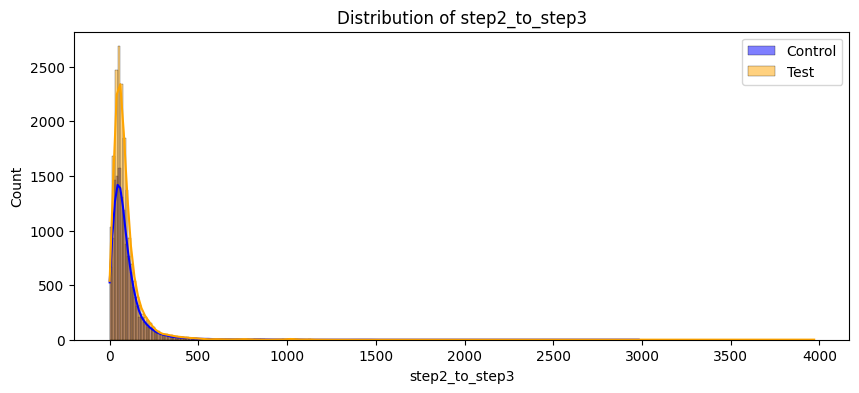

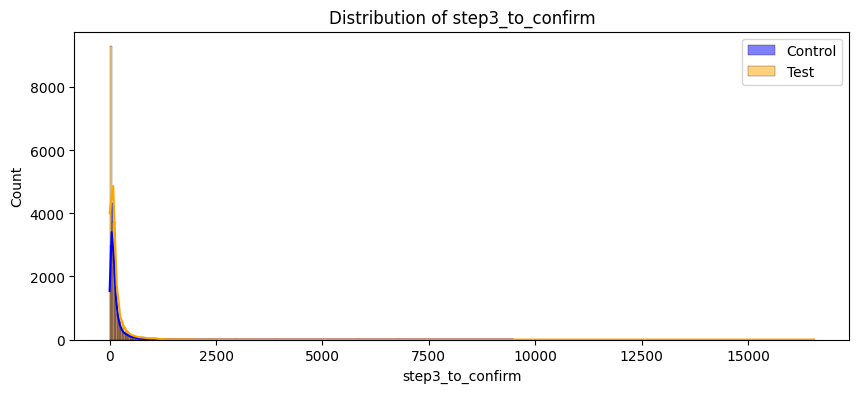

In [24]:
for col in step_columns:
    plt.figure(figsize=(10, 4))

    sns.histplot(df_pivot[df_pivot["Variation"] == "Control"][col], kde=True, color="blue", label="Control")
    sns.histplot(df_pivot[df_pivot["Variation"] == "Test"][col], kde=True, color="orange", label="Test")

    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

In [28]:
from scipy.stats import ttest_ind

step_columns = ["start_to_step1", "step1_to_step2", "step2_to_step3", "step3_to_confirm"]

for col in step_columns:
    control_times = df_pivot[df_pivot["Variation"] == "Control"][col].dropna()
    test_times = df_pivot[df_pivot["Variation"] == "Test"][col].dropna()
    
    stat, p_value = ttest_ind(control_times, test_times, equal_var=False) 

    print(f"\nT-test for {col}:")
    print(f"  t-statistic = {stat:.2f}")
    print(f"  p-value     = {p_value:.2f}")
    if p_value < 0.05:
        print("Significant difference at 5% level.")
    else:
        print("No significant difference at 5% level.")


T-test for start_to_step1:
  t-statistic = 5.07
  p-value     = 0.00
Significant difference at 5% level.

T-test for step1_to_step2:
  t-statistic = 7.32
  p-value     = 0.00
Significant difference at 5% level.

T-test for step2_to_step3:
  t-statistic = 1.11
  p-value     = 0.27
No significant difference at 5% level.

T-test for step3_to_confirm:
  t-statistic = -2.26
  p-value     = 0.02
Significant difference at 5% level.


In [30]:
from scipy.stats import mannwhitneyu

step_columns = ["start_to_step1", "step1_to_step2", "step2_to_step3", "step3_to_confirm"]

for col in step_columns:
    control = df_pivot[df_pivot["Variation"] == "Control"][col].dropna()
    test = df_pivot[df_pivot["Variation"] == "Test"][col].dropna()

    stat, p = mannwhitneyu(control, test, alternative='two-sided')

    print(f"\nStep: {col}")
    print(f"U-statistic = {stat:.2f}")
    print(f"p-value     = {p:.4f}")

    if p < 0.05:
        print("Statistically significant difference (p < 0.05)")
    else:
        print("No statistically significant difference (p ≥ 0.05)")


Step: start_to_step1
U-statistic = 155093828.50
p-value     = 0.0000
Statistically significant difference (p < 0.05)

Step: step1_to_step2
U-statistic = 121448423.00
p-value     = 0.0000
Statistically significant difference (p < 0.05)

Step: step2_to_step3
U-statistic = 124049991.00
p-value     = 0.1491
No statistically significant difference (p ≥ 0.05)

Step: step3_to_confirm
U-statistic = 143178035.50
p-value     = 0.0000
Statistically significant difference (p < 0.05)
